# USANDO DATI REALI FLAFLA


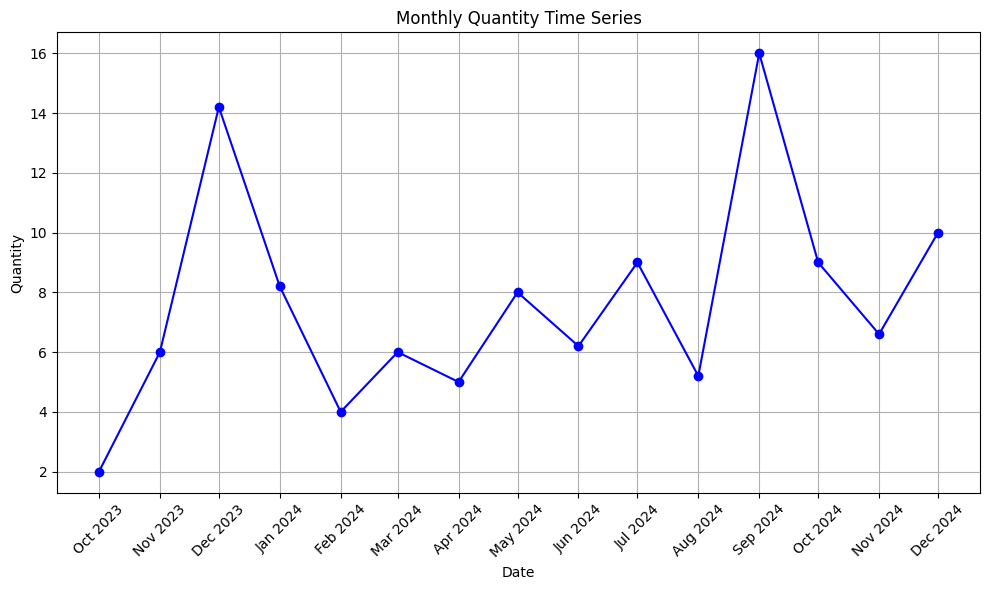

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

date_vector = pd.date_range(start='2023-10-01', end='2024-12-01', freq='MS')
qty = [2, 6, 14.2, 8.2, 4, 6, 5, 8, 6.2, 9, 5.2, 16, 9, 6.6, 10]
data = pd.DataFrame({'Date': date_vector, 'Quantity': qty})

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Quantity'], marker='o', linestyle='-', color='b')
plt.title('Monthly Quantity Time Series')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(data['Date'], data['Date'].dt.strftime('%b %Y'), rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Date e quantità reali
date_real = pd.date_range(start='2023-10-01', end='2024-12-01', freq='MS')
qty_real = [2, 6, 14.2, 8.2, 4, 6, 5, 8, 6.2, 9, 5.2, 16, 9, 6.6, 10]
data_real = pd.DataFrame({'Date': date_real, 'Quantity': qty_real})


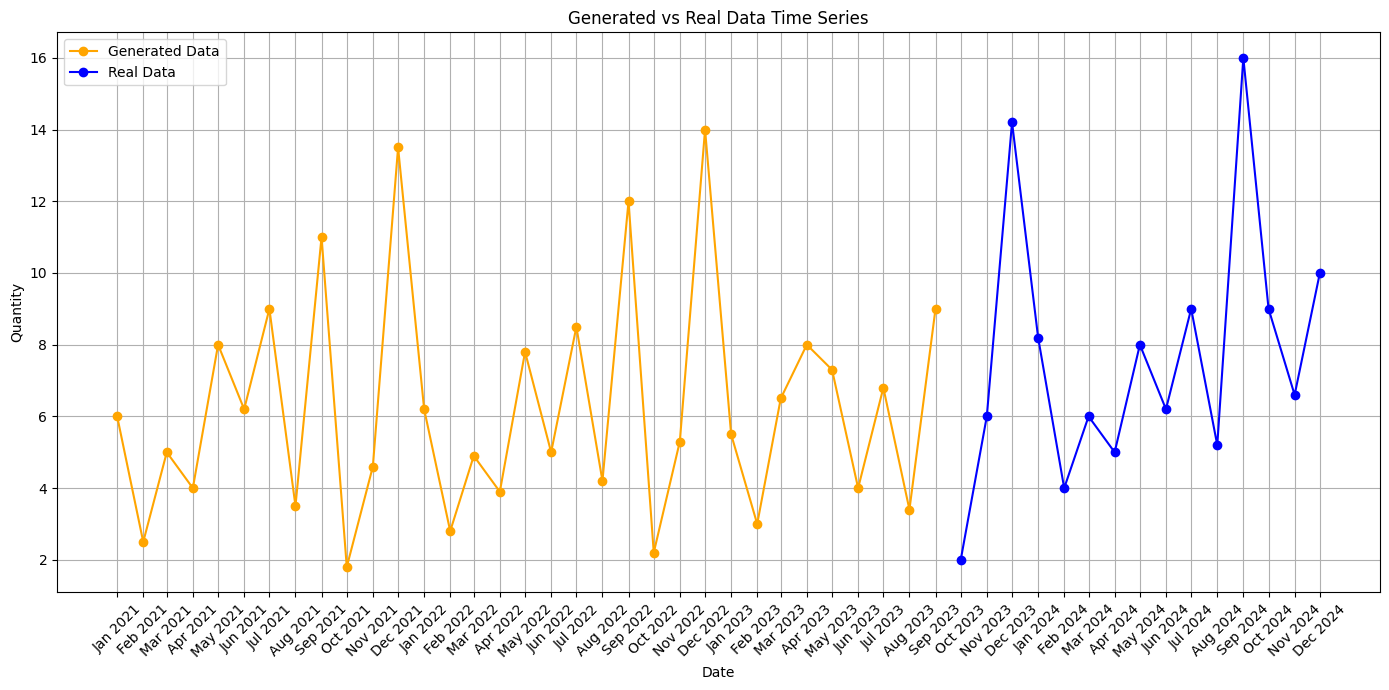

In [ ]:
# Dati generati manualmente
date_generated = pd.date_range(start='2021-01-01', end='2023-09-01', freq='MS')
qty_generated = [7.0, 3.5, 6.0, 5.0, 9.0, 7.2, 10.0, 4.5, 12.0, 2.8, 5.6, 14.5,
                 7.2, 3.8, 5.9, 4.9, 8.8, 6.0, 9.5, 5.2, 13.0, 3.2, 6.3, 15.0,
                 6.5, 4.0, 7.5, 9.0, 8.3, 5.0, 7.8, 4.4, 10.0]

qty_generated = [round(value - 1, 1) for value in qty_generated]

# Dati reali
date_real = pd.date_range(start='2023-10-01', end='2024-12-01', freq='MS')
qty_real = [2, 6, 14.2, 8.2, 4, 6, 5, 8, 6.2, 9, 5.2, 16, 9, 6.6, 10]

# Creare DataFrame
data_generated = pd.DataFrame({'Date': date_generated, 'Quantity': qty_generated})
data_real = pd.DataFrame({'Date': date_real, 'Quantity': qty_real})

# Grafico
plt.figure(figsize=(14, 7))
plt.plot(data_generated['Date'], data_generated['Quantity'], marker='o', linestyle='-', color='orange', label='Generated Data')
plt.plot(data_real['Date'], data_real['Quantity'], marker='o', linestyle='-', color='blue', label='Real Data')
plt.title('Generated vs Real Data Time Series')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)

# Visualizzare tutti i mesi
all_dates = pd.concat([data_generated['Date'], data_real['Date']])
plt.xticks(all_dates, all_dates.dt.strftime('%b %Y'), rotation=45)

# Aggiungere legenda
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA Model:
R²: -0.5638
MSE: 17.1774
RMSE: 4.1446

Linear Model:
R²: 0.8025
MSE: 2.1692
RMSE: 1.4728



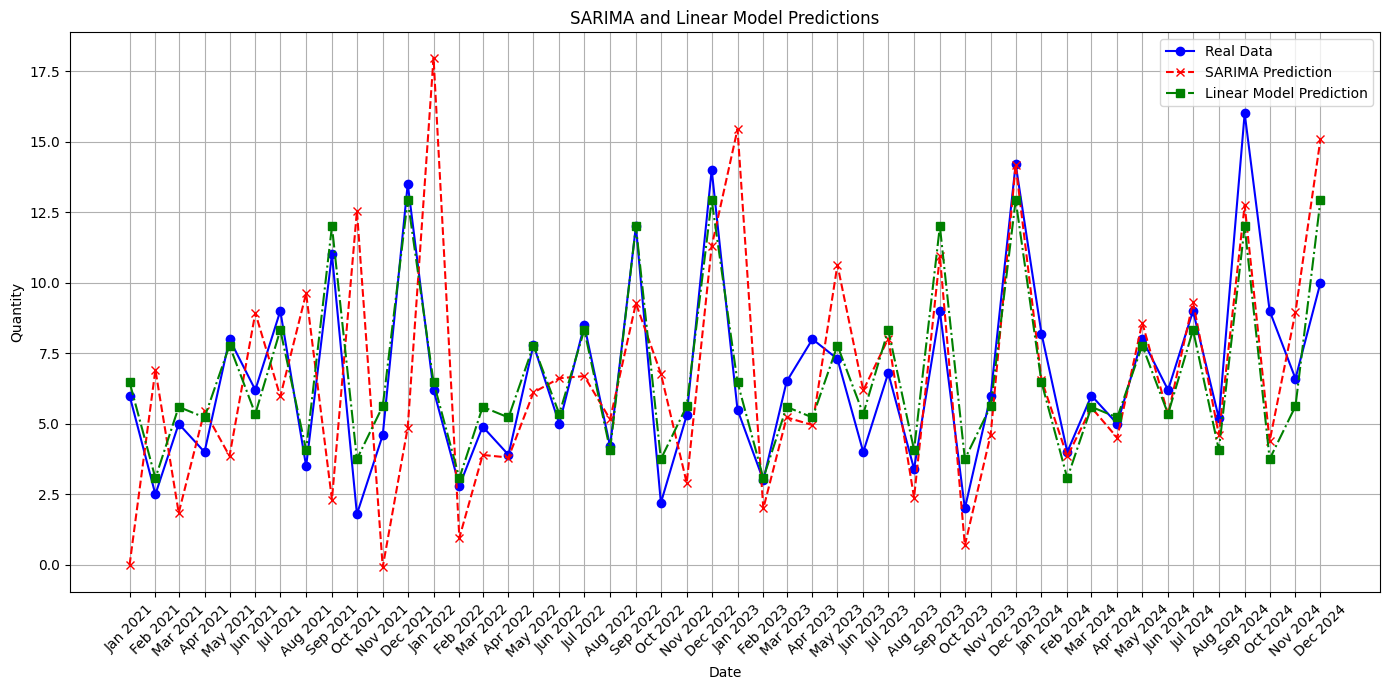

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from math import sqrt

# Dati generati manualmente
date_generated = pd.date_range(start='2021-01-01', end='2023-09-01', freq='MS')
qty_generated = [7.0, 3.5, 6.0, 5.0, 9.0, 7.2, 10.0, 4.5, 12.0, 2.8, 5.6, 14.5,
                 7.2, 3.8, 5.9, 4.9, 8.8, 6.0, 9.5, 5.2, 13.0, 3.2, 6.3, 15.0,
                 6.5, 4.0, 7.5, 9.0, 8.3, 5.0, 7.8, 4.4, 10.0]

qty_generated = [round(value - 1, 1) for value in qty_generated]

# Dati reali
date_real = pd.date_range(start='2023-10-01', end='2024-12-01', freq='MS')
qty_real = [2, 6, 14.2, 8.2, 4, 6, 5, 8, 6.2, 9, 5.2, 16, 9, 6.6, 10]

# Creare DataFrame
data_generated = pd.DataFrame({'Date': date_generated, 'Quantity': qty_generated})
data_real = pd.DataFrame({'Date': date_real, 'Quantity': qty_real})

data_real = pd.concat([data_generated, data_real])
data_real = data_real.sort_values(by='Date')


# SARIMA
sarima_model = SARIMAX(data_real['Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# Previsioni SARIMA, correggere per allineamento
data_real['SARIMA_Pred'] = sarima_result.predict(start=0, end=len(data_real)-1)

# Modello lineare con variabile mese
data_real['Month'] = data_real['Date'].dt.month
lm_model = smf.ols('Quantity ~ C(Month)', data=data_real).fit()
data_real['LM_Pred'] = lm_model.predict(data_real)

# Calcolare R², MSE e RMSE per il modello SARIMA
sarima_mse = mean_squared_error(data_real['Quantity'], data_real['SARIMA_Pred'])
sarima_rmse = sqrt(sarima_mse)

# Calcolare R² per il modello SARIMA
sarima_r2 = 1 - (np.sum((data_real['Quantity'] - data_real['SARIMA_Pred']) ** 2) / np.sum((data_real['Quantity'] - np.mean(data_real['Quantity'])) ** 2))

# Calcolare MSE, RMSE e R² per il modello lineare
lm_r2 = lm_model.rsquared
lm_mse = mean_squared_error(data_real['Quantity'], data_real['LM_Pred'])
lm_rmse = sqrt(lm_mse)

# Stampa dei risultati
print(f"SARIMA Model:")
print(f"R²: {sarima_r2:.4f}")
print(f"MSE: {sarima_mse:.4f}")
print(f"RMSE: {sarima_rmse:.4f}\n")

print(f"Linear Model:")
print(f"R²: {lm_r2:.4f}")
print(f"MSE: {lm_mse:.4f}")
print(f"RMSE: {lm_rmse:.4f}\n")

# Grafico
plt.figure(figsize=(14, 7))
plt.plot(data_real['Date'], data_real['Quantity'], marker='o', linestyle='-', color='blue', label='Real Data')
plt.plot(data_real['Date'], data_real['SARIMA_Pred'], marker='x', linestyle='--', color='red', label='SARIMA Prediction')
plt.plot(data_real['Date'], data_real['LM_Pred'], marker='s', linestyle='-.', color='green', label='Linear Model Prediction')
plt.title('SARIMA and Linear Model Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.legend()
plt.xticks(data_real['Date'], data_real['Date'].dt.strftime('%b %Y'), rotation=45)

plt.tight_layout()
plt.show()

# SARIMA FA CAGARE MA SECONDO ME HA QUALCHE PROBLEMA PYTHON--> TUTTE PREVISIONI SPOSTATE DI UNO A DX SEMBRA!!!!!

In [ ]:
data_real.reset_index(drop=True, inplace=True)

## PROVIAMO UNA PORCATA

<ipython-input-78-1fc3ce0ea4f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Quantity"] = [round(qty*1.5 + 8,1) for qty in data["Quantity"]]
<ipython-input-78-1fc3ce0ea4f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"Quantity": "Baccala_Mantecato"}, inplace=True)


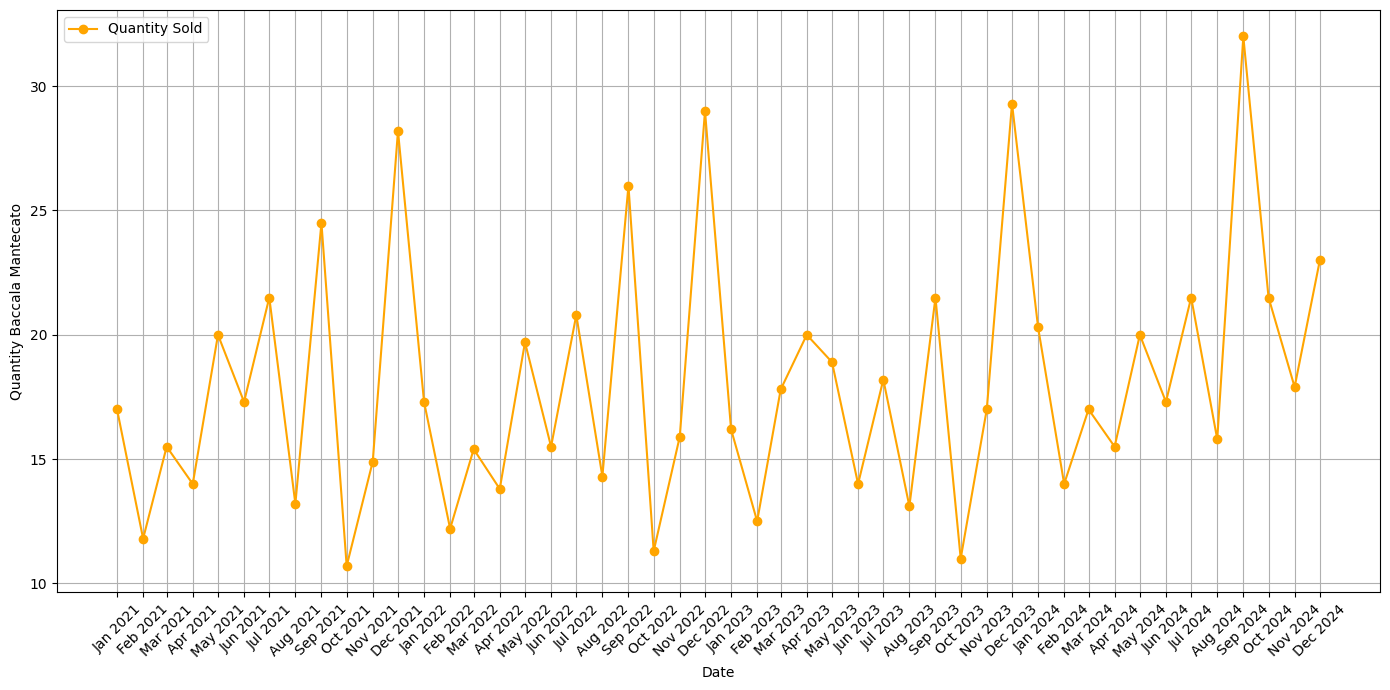

In [ ]:
data = data_real[["Date", "Quantity"]]
data["Quantity"] = [round(qty*1.5 + 8,1) for qty in data["Quantity"]]
data.rename(columns={"Quantity": "Baccala_Mantecato"}, inplace=True)
# Grafico
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Baccala_Mantecato'], marker='o', linestyle='-', color='orange', label='Quantity Sold')
plt.xlabel('Date')
plt.ylabel('Quantity Baccala Mantecato')
plt.grid(True)
all_dates = data['Date']
plt.xticks(all_dates, all_dates.dt.strftime('%b %Y'), rotation=45)

# Aggiungere legenda
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-80-86cfd667e73c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Baccala_Vicentina'] = data['Baccala_Mantecato'] / 4 + np.random.uniform(-0.5, 0.5, len(data))
<ipython-input-80-86cfd667e73c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Baccala_Vicentina'] = [round(qty + 2, 1) for qty in data['Baccala_Vicentina']]


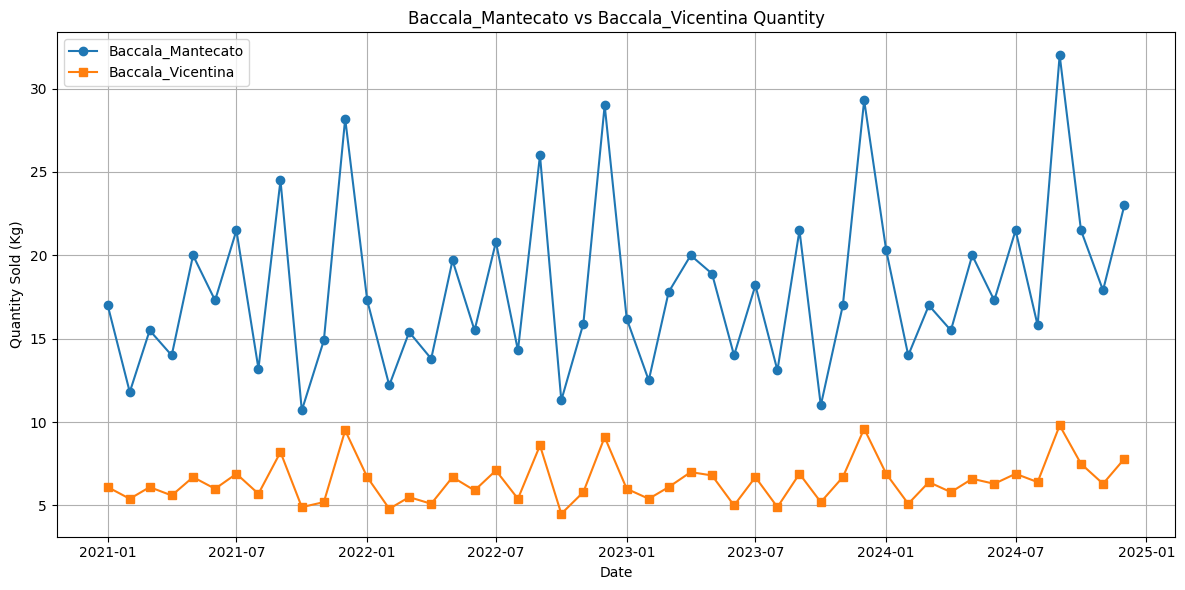

In [ ]:
import numpy as np

# Generazione di una nuova serie approssimativamente 4 volte inferiore con variazioni casuali
np.random.seed(42)  # Per risultati ripetibili
data['Baccala_Vicentina'] = data['Baccala_Mantecato'] / 4 + np.random.uniform(-0.5, 0.5, len(data)) # messo io
data['Baccala_Vicentina'] = [round(qty + 2, 1) for qty in data['Baccala_Vicentina']] # messo io


plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Baccala_Mantecato'], label='Baccala_Mantecato', marker='o')
plt.plot(data['Date'], data['Baccala_Vicentina'], label='Baccala_Vicentina', marker='s')

# Etichette e legenda
plt.xlabel('Date')
plt.ylabel('Quantity Sold (Kg)')
plt.title('Baccala_Mantecato vs Baccala_Vicentina Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()


In [ ]:
data.head(2)

,Date,Baccala_Mantecato,Baccala_Vicentina
0,2021-01-01,17.0,6.1
1,2021-02-01,11.8,5.4


<ipython-input-82-1f0274427db9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Date'].dt.month


R^2 per Baccalà Mantecato: 0.80
R^2 per Baccalà alla Vicentina: 0.76
MSE per Baccalà Mantecato: 4.89
MSE per Baccalà alla Vicentina: 0.39


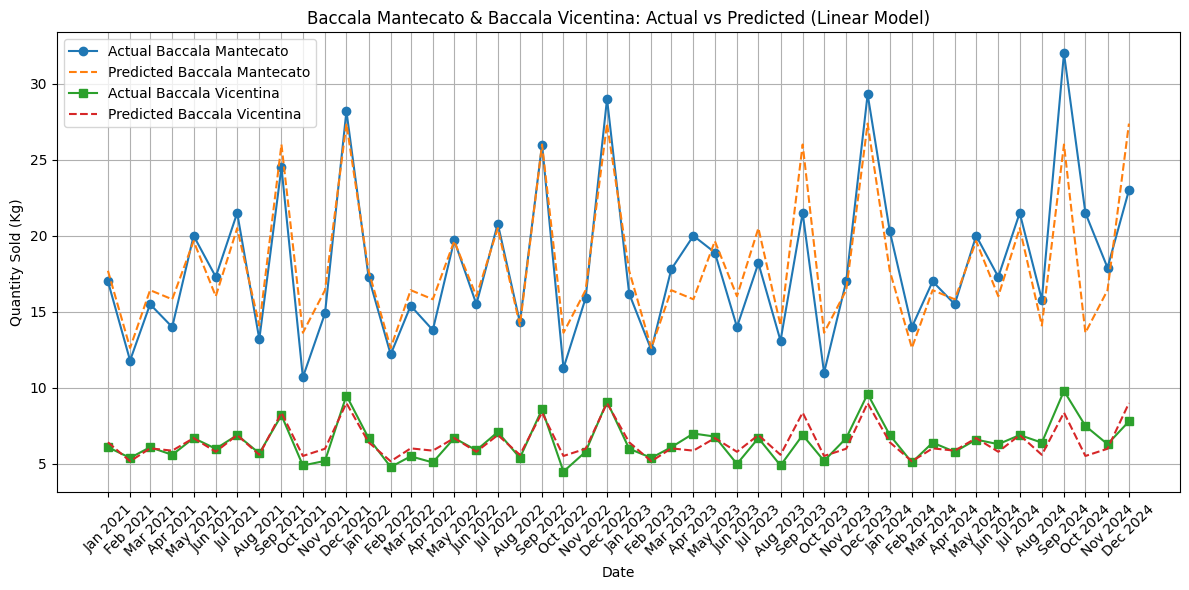

In [ ]:
import statsmodels.formula.api as smf

# Creazione della variabile 'Month' basata sulla colonna 'Date'
data['Month'] = data['Date'].dt.month

# Modello lineare con la variabile stagionale 'Month' per Baccalà Mantecato
lm_model_mantecato = smf.ols('Baccala_Mantecato ~ C(Month)', data=data).fit()
data['LM_Pred_Mantecato'] = lm_model_mantecato.predict(data)

# Modello lineare con la variabile stagionale 'Month' per Baccalà alla Vicentina
lm_model_vicentina = smf.ols('Baccala_Vicentina ~ C(Month)', data=data).fit()
data['LM_Pred_Vicentina'] = lm_model_vicentina.predict(data)

# Stampa dei risultati
print(f'R^2 per Baccalà Mantecato: {lm_model_mantecato.rsquared:.2f}')
print(f'R^2 per Baccalà alla Vicentina: {lm_model_vicentina.rsquared:.2f}')
print(f'MSE per Baccalà Mantecato: {mean_squared_error(data["Baccala_Mantecato"], data["LM_Pred_Mantecato"]):.2f}')
print(f'MSE per Baccalà alla Vicentina: {mean_squared_error(data["Baccala_Vicentina"], data["LM_Pred_Vicentina"]):.2f}')

# Grafico delle previsioni
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Baccala_Mantecato'], label='Actual Baccala Mantecato', marker='o')
plt.plot(data['Date'], data['LM_Pred_Mantecato'], label='Predicted Baccala Mantecato', linestyle='--')
plt.plot(data['Date'], data['Baccala_Vicentina'], label='Actual Baccala Vicentina', marker='s')
plt.plot(data['Date'], data['LM_Pred_Vicentina'], label='Predicted Baccala Vicentina', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Quantity Sold (Kg)')
plt.title('Baccala Mantecato & Baccala Vicentina: Actual vs Predicted (Linear Model)')
all_dates = data['Date']
plt.xticks(all_dates, all_dates.dt.strftime('%b %Y'), rotation=45)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## PROVIAMO UNA SECONDA PORCATA

In [ ]:
data_original = data.copy()

In [ ]:
import pandas as pd

data = data_original.copy()

# http://dati.istat.it/Index.aspx?DataSetCode=dcsc_prezzpind_1#
# Lista dei valori dell'indice dei prezzi
indice_prezzi = [
    98.5, 100.6, 99.3, 100.8, 100.0, 98.3, 100.1, 99.7, 99.9, 101.1, 101.1, 100.5,
    103.7, 109.1, 105.7, 108.9, 114.8, 111.9, 115.5, 114.5, 116.5, 118.3, 119.3, 118.1,
    123.5, 126.7, 124.6, 122.7, 125.1, 123.3, 123.4, 124.1, 124.2, 127.3, 124.7, 125.0,
    127.2, 127.3, 130.8, 126.4, 125.1, 120.3, 124.9, 125.7, 126.6, 122.8, 125.7, 126.4
]

# Aggiungi la colonna all'oggetto data
data['Indice_Prezzi_Baccala'] = indice_prezzi
data['Indice_Prezzi_Baccala_Normalized'] = (data['Indice_Prezzi_Baccala'] - data['Indice_Prezzi_Baccala'].mean()) / data['Indice_Prezzi_Baccala'].std()

# Verifica il risultato
data.head()


,Date,Baccala_Mantecato,Baccala_Vicentina,Month,LM_Pred_Mantecato,LM_Pred_Vicentina,Indice_Prezzi_Baccala,Indice_Prezzi_Baccala_Normalized
0,2021-01-01,17.0,6.1,1,17.700,6.425,98.5,-1.588841
1,2021-02-01,11.8,5.4,2,12.625,5.175,100.6,-1.396347
2,2021-03-01,15.5,6.1,3,16.425,6.025,99.3,-1.515510
3,2021-04-01,14.0,5.6,4,15.825,5.875,100.8,-1.378014
4,2021-05-01,20.0,6.7,5,19.650,6.700,100.0,-1.451345


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

data['Indice_Prezzi_Baccala_Normalized_Adjusted'] = data['Indice_Prezzi_Baccala_Normalized'] - data['Indice_Prezzi_Baccala_Normalized'].min()  # Ad esempio aggiungiamo 1 per evitare valori <= 0
# Creiamo una nuova variabile combinata: Baccala_Mantecato aggiustato per l'indice dei prezzi
data['Baccala_Mantecato_Combined'] = data['Baccala_Mantecato'] + 0.03 * data['Baccala_Mantecato'] * data['Indice_Prezzi_Baccala_Normalized_Adjusted']

# Modello di regressione per Baccala_Mantecato combinato
lm_model_mantecato = smf.ols('Baccala_Mantecato_Combined ~ C(Month) + Indice_Prezzi_Baccala_Normalized_Adjusted', data=data).fit()

# Visualizza i risultati per Baccala_Mantecato combinato
print("Risultati per Baccala_Mantecato combinato con Indice Prezzi:")
print(lm_model_mantecato.summary())

Risultati per Baccala_Mantecato combinato con Indice Prezzi:
                                OLS Regression Results                                
Dep. Variable:     Baccala_Mantecato_Combined   R-squared:                       0.816
Model:                                    OLS   Adj. R-squared:                  0.753
Method:                         Least Squares   F-statistic:                     12.93
Date:                        Mon, 06 Jan 2025   Prob (F-statistic):           1.57e-09
Time:                                19:21:49   Log-Likelihood:                -107.69
No. Observations:                          48   AIC:                             241.4
Df Residuals:                              35   BIC:                             265.7
Df Model:                                  12                                         
Covariance Type:                    nonrobust                                         
                                                coef    std err      

In [ ]:
# Creiamo una nuova variabile combinata per Baccala_Vicentina
data['Baccala_Vicentina_Combined'] = data['Baccala_Vicentina'] + 0.01 * data['Baccala_Vicentina'] * data['Indice_Prezzi_Baccala_Normalized_Adjusted']

# Modello di regressione per Baccala_Vicentina combinato
lm_model_vicentina = smf.ols('Baccala_Vicentina_Combined ~ C(Month) + Indice_Prezzi_Baccala_Normalized_Adjusted', data=data).fit()

print("Risultati per Baccala_Vicentina combinato con Indice Prezzi prod ecc:")
print(lm_model_vicentina.summary())

Risultati per Baccala_Vicentina combinato con Indice Prezzi:
                                OLS Regression Results                                
Dep. Variable:     Baccala_Vicentina_Combined   R-squared:                       0.771
Model:                                    OLS   Adj. R-squared:                  0.692
Method:                         Least Squares   F-statistic:                     9.819
Date:                        Mon, 06 Jan 2025   Prob (F-statistic):           5.53e-08
Time:                                19:22:10   Log-Likelihood:                -45.423
No. Observations:                          48   AIC:                             116.8
Df Residuals:                              35   BIC:                             141.2
Df Model:                                  12                                         
Covariance Type:                    nonrobust                                         
                                                coef    std err      

MSE per Baccala_Mantecato_Combined: 5.203767432392506
R² per Baccala_Mantecato_Combined: 0.8159377184809757
MSE per Baccala_Vicentina_Combined: 0.38858517741347076
R² per Baccala_Vicentina_Combined: 0.7709773841813836


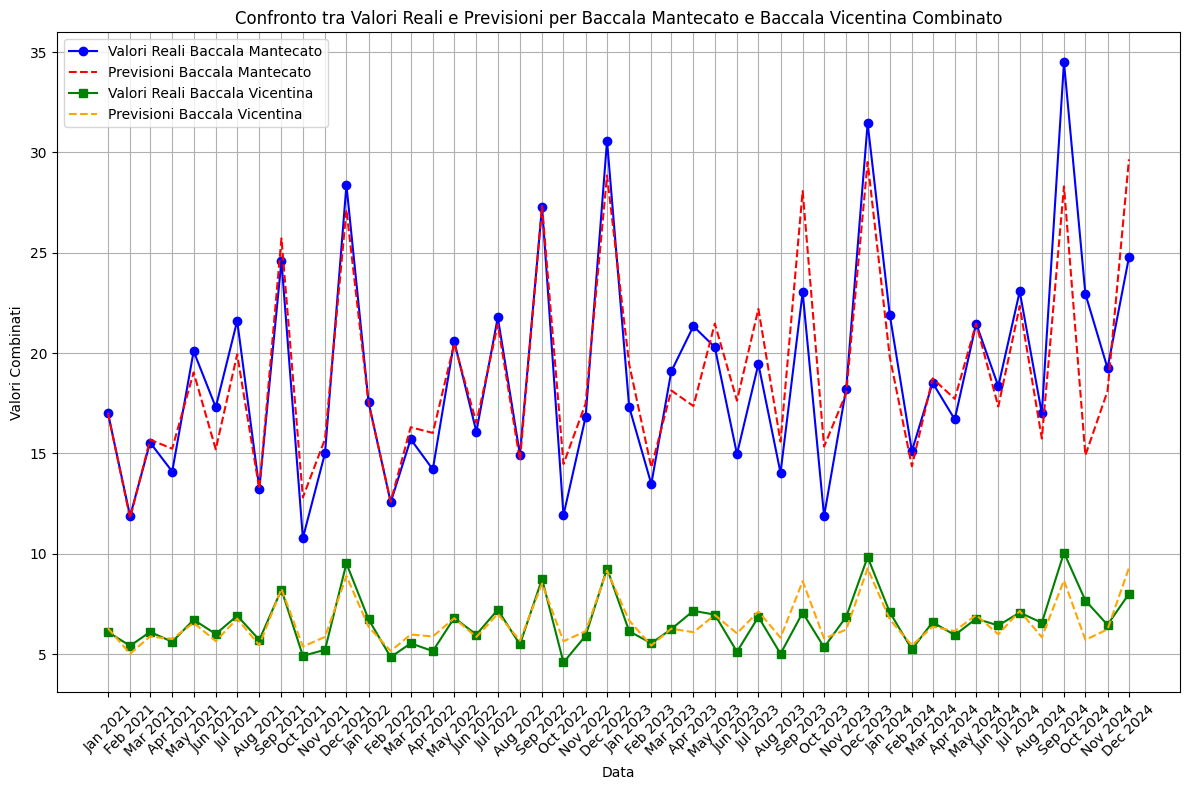

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calcola le previsioni per i modelli
pred_vicentina = lm_model_vicentina.predict(data)
pred_mantecato = lm_model_mantecato.predict(data)

# Calcola MSE e R² per il modello di Baccala_Vicentina_Combined
mse_vicentina = mean_squared_error(data['Baccala_Vicentina_Combined'], pred_vicentina)
r2_vicentina = r2_score(data['Baccala_Vicentina_Combined'], pred_vicentina)

# Calcola MSE e R² per il modello di Baccala_Mantecato_Combined
mse_mantecato = mean_squared_error(data['Baccala_Mantecato_Combined'], pred_mantecato)
r2_mantecato = r2_score(data['Baccala_Mantecato_Combined'], pred_mantecato)

# Stampa i risultati
print(f"MSE per Baccala_Mantecato_Combined: {mse_mantecato}")
print(f"R² per Baccala_Mantecato_Combined: {r2_mantecato}")
print(f"MSE per Baccala_Vicentina_Combined: {mse_vicentina}")
print(f"R² per Baccala_Vicentina_Combined: {r2_vicentina}")


# Aggiungi le previsioni per Baccala_Mantecato_Combined e Baccala_Vicentina_Combined
data['LM_Pred_Mantecato_Combined'] = lm_model_mantecato.predict(data)
data['LM_Pred_Vicentina_Combined'] = lm_model_vicentina.predict(data)

# Grafico: Confronta entrambe le serie storiche e le loro previsioni
plt.figure(figsize=(12, 8))

# Serie storica e previsioni per Baccala_Mantecato
plt.plot(data['Date'], data['Baccala_Mantecato_Combined'], label='Valori Reali Baccala Mantecato', color='blue',  marker='o')
plt.plot(data['Date'], data['LM_Pred_Mantecato_Combined'], label='Previsioni Baccala Mantecato', color='red', linestyle='--')

# Serie storica e previsioni per Baccala_Vicentina
plt.plot(data['Date'], data['Baccala_Vicentina_Combined'], label='Valori Reali Baccala Vicentina', color='green',  marker='s')
plt.plot(data['Date'], data['LM_Pred_Vicentina_Combined'], label='Previsioni Baccala Vicentina', color='orange', linestyle='--')

# Aggiungi etichette e titolo
plt.title('Confronto tra Valori Reali e Previsioni per Baccala Mantecato e Baccala Vicentina Combinato')
plt.xlabel('Data')
plt.ylabel('Valori Combinati')
plt.legend()

all_dates = data['Date']
plt.xticks(all_dates, all_dates.dt.strftime('%b %Y'), rotation=45)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

